## Task1

Enter the start date (YYYY-MM-DD):  20231001
Enter the end date (YYYY-MM-DD):  20231231


On-Time Delivery Percentage: 62.65%


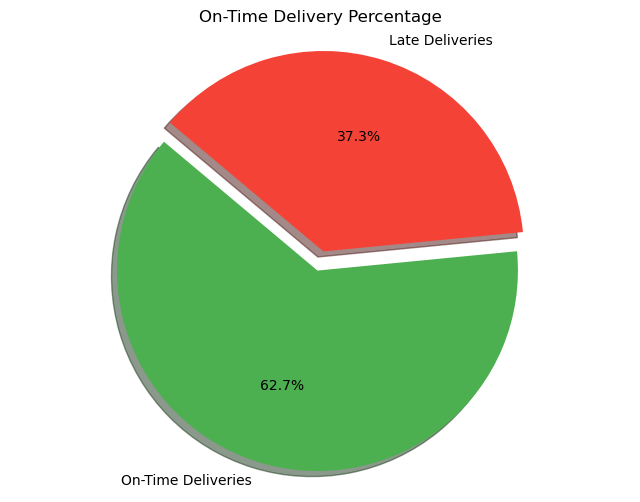

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Constants for file paths
GPS_PATH = 'GPS_data.csv'
BOOKINGS_PATH = 'Shipment_bookings.csv'

def load_data(gps_path, bookings_path):
    """
    Load GPS and shipment booking datasets from specified file paths.

    Parameters:
    gps_path (str): The file path to the GPS data CSV.
    bookings_path (str): The file path to the shipment bookings CSV.

    Returns:
    tuple: A tuple containing two pandas DataFrames, GPS data and shipment bookings.
    """
    try:
        gps_data = pd.read_csv(gps_path)
        shipment_bookings = pd.read_csv(bookings_path)
        return gps_data, shipment_bookings
    except Exception as e:
        print(f"Error loading data: {e}")
        raise

def convert_to_datetime(gps_data, shipment_bookings):
    """
    Convert relevant columns in the datasets to datetime objects.

    Parameters:
    gps_data (pd.DataFrame): The GPS data containing 'RECORD_TIMESTAMP'.
    shipment_bookings (pd.DataFrame): The booking data containing 'LAST_DELIVERY_SCHEDULE_LATEST'.

    Returns:
    tuple: A tuple containing the modified DataFrames with datetime formatted columns.
    """
    try:
        gps_data['RECORD_TIMESTAMP'] = pd.to_datetime(gps_data['RECORD_TIMESTAMP'], utc=True)
        shipment_bookings['LAST_DELIVERY_SCHEDULE_LATEST'] = pd.to_datetime(shipment_bookings['LAST_DELIVERY_SCHEDULE_LATEST'], utc=True)
        return gps_data, shipment_bookings
    except Exception as e:
        print(f"Error converting to datetime: {e}")
        raise

def filter_gps_data(gps_data, start_date, end_date):
    """
    Filter GPS records within a specified date range.

    Parameters:
    gps_data (pd.DataFrame): GPS data with 'RECORD_TIMESTAMP' as datetime.
    start_date (str): The start date for filtering (inclusive).
    end_date (str): The end date for filtering (inclusive).

    Returns:
    pd.DataFrame: Filtered GPS data within the specified date range.
    """
    try:
        filtered_data = gps_data[(gps_data['RECORD_TIMESTAMP'] >= start_date) & (gps_data['RECORD_TIMESTAMP'] <= end_date)]
        return filtered_data
    except Exception as e:
        print(f"Error filtering GPS data: {e}")
        raise

def analyze_deliveries(gps_data_filtered, shipment_bookings):
    """
    Analyze delivery timeliness by merging GPS and booking data to calculate on-time delivery percentage.

    Parameters:
    gps_data_filtered (pd.DataFrame): Filtered GPS data.
    shipment_bookings (pd.DataFrame): Shipment bookings data.

    Returns:
    float: Percentage of on-time deliveries.
    """
    try:
        latest_gps_timestamps = gps_data_filtered.groupby('SHIPMENT_NUMBER')['RECORD_TIMESTAMP'].max().reset_index()
        merged_results = pd.merge(latest_gps_timestamps, shipment_bookings, on='SHIPMENT_NUMBER', how='left')
        merged_results['ON_TIME'] = merged_results.apply(lambda row: row['RECORD_TIMESTAMP'] <= (row['LAST_DELIVERY_SCHEDULE_LATEST'] + pd.Timedelta(minutes=30)), axis=1)
        return merged_results['ON_TIME'].mean() * 100
    except Exception as e:
        print(f"Error analyzing deliveries: {e}")
        raise

def plot_delivery_performance(on_time_delivery_percentage):
    """
    Plot a pie chart representing the on-time delivery performance.

    Parameters:
    on_time_delivery_percentage (float): The percentage of on-time deliveries.
    """
    try:
        data = [on_time_delivery_percentage, 100 - on_time_delivery_percentage]
        labels = ['On-Time Deliveries', 'Late Deliveries']
        colors = ['#4CAF50', '#F44336']
        explode = (0.1, 0)  # Explode the 1st slice (On-Time)
        plt.figure(figsize=(8, 6))
        plt.pie(data, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
        plt.title('On-Time Delivery Percentage')
        plt.axis('equal')  # Ensure that pie is drawn as a circle.
        plt.show()
    except Exception as e:
        print(f"Error plotting delivery performance: {e}")
        raise

def main():
    """
    Main function to run the delivery analysis.
    """
    try:
        start_date = input("Enter the start date (YYYY-MM-DD): ")
        end_date = input("Enter the end date (YYYY-MM-DD): ")

        gps_data, shipment_bookings = load_data(GPS_PATH, BOOKINGS_PATH)
        gps_data, shipment_bookings = convert_to_datetime(gps_data, shipment_bookings)
        gps_data_filtered = filter_gps_data(gps_data, start_date, end_date)
        on_time_delivery_percentage = analyze_deliveries(gps_data_filtered, shipment_bookings)
        print(f"On-Time Delivery Percentage: {on_time_delivery_percentage:.2f}%")
        plot_delivery_performance(on_time_delivery_percentage)
    except Exception as e:
        print(f"An error occurred in the main execution: {e}")

if __name__ == "__main__":
    main()


## Task2

In [7]:
import pandas as pd

def load_and_prepare_data(gps_path, bookings_path):
    """
    Load GPS and shipment booking datasets and prepare them by converting relevant timestamp columns to datetime.
    
    Parameters:
    gps_path (str): File path to the GPS data CSV.
    bookings_path (str): File path to the shipment bookings CSV.
    
    Returns:
    tuple: A tuple containing two prepared pandas DataFrames, gps_data and shipment_bookings.
    """
    try:
        gps_data = pd.read_csv(gps_path)
        shipment_bookings = pd.read_csv(bookings_path)
        
        gps_data['RECORD_TIMESTAMP'] = pd.to_datetime(gps_data['RECORD_TIMESTAMP'], utc=True, errors='coerce')
        shipment_bookings['LAST_DELIVERY_SCHEDULE_LATEST'] = pd.to_datetime(shipment_bookings['LAST_DELIVERY_SCHEDULE_LATEST'], utc=True, errors='coerce')
        
        return gps_data, shipment_bookings
    except Exception as e:
        print(f"Error loading and preparing data: {e}")
        raise

def filter_and_merge_data(gps_data, shipment_bookings, start_date, end_date):
    """
    Filter GPS data within a specified date range and merge with shipment bookings to find late shipments.
    
    Parameters:
    gps_data (pd.DataFrame): GPS data with timestamps converted to datetime.
    shipment_bookings (pd.DataFrame): Shipment bookings with timestamps converted to datetime.
    start_date (str): Start date for the filtering period.
    end_date (str): End date for the filtering period.
    
    Returns:
    pd.DataFrame: Merged data with a new column indicating if the shipment is potentially late.
    """
    try:
        filtered_gps_data = gps_data[(gps_data['RECORD_TIMESTAMP'] >= start_date) & (gps_data['RECORD_TIMESTAMP'] <= end_date)]
        latest_gps_records = filtered_gps_data.groupby('SHIPMENT_NUMBER')['RECORD_TIMESTAMP'].max().reset_index()
        
        merged_data = pd.merge(latest_gps_records, shipment_bookings, on='SHIPMENT_NUMBER')
        merged_data['IS_LATE'] = merged_data.apply(lambda x: x['RECORD_TIMESTAMP'] > (x['LAST_DELIVERY_SCHEDULE_LATEST'] + pd.Timedelta(minutes=30)), axis=1)
        
        return merged_data
    except Exception as e:
        print(f"Error filtering and merging data: {e}")
        raise

def notify_shippers(merged_data):
    """
    Identify and notify about late shipments.
    
    Parameters:
    merged_data (pd.DataFrame): Merged data with information on shipment timeliness.
    
    Prints:
    Notification for each late shipment.
    """
    try:
        late_shipments = merged_data[merged_data['IS_LATE']]
        notifications = late_shipments[['SHIPMENT_NUMBER', 'RECORD_TIMESTAMP', 'LAST_DELIVERY_SCHEDULE_LATEST']]
        
        for index, row in notifications.iterrows():
            print(f"Notification: Shipment {row['SHIPMENT_NUMBER']} is late as of {row['RECORD_TIMESTAMP']}.")
    except Exception as e:
        print(f"Error notifying shippers: {e}")
        raise

def calculate_and_print_delays(merged_data):
    """
    Calculate and print the number of delays for each shipment and the total number of delays.
    
    Parameters:
    merged_data (pd.DataFrame): Merged data with information on shipment timeliness.
    """
    try:
        total_delays = merged_data['IS_LATE'].sum()
        print(f"Total number of delays: {total_delays}")
        
        delay_counts = merged_data.groupby('SHIPMENT_NUMBER')['IS_LATE'].sum().reset_index()
        delay_counts.columns = ['SHIPMENT_NUMBER', 'Number_of_Delays']
        
        sum_of_delays = (merged_data['RECORD_TIMESTAMP'] - merged_data['LAST_DELIVERY_SCHEDULE_LATEST']).dt.total_seconds()
        total_delay_time = sum_of_delays[merged_data['IS_LATE']].sum()
        print(f"Total delay time in seconds: {total_delay_time}")
    except Exception as e:
        print(f"Error calculating and printing delays: {e}")
        raise

def save_delayed_deliveries(merged_data, start_date, end_date):
    """
    Save the delayed deliveries to a CSV file.
    
    Parameters:
    merged_data (pd.DataFrame): Merged data with information on shipment timeliness.
    start_date (str): Start date for the filtering period.
    end_date (str): End date for the filtering period.
    """
    try:
        delayed_deliveries = merged_data[merged_data['IS_LATE']]
        file_name = f"delayed_deliveries_{start_date}_to_{end_date}.csv"
        delayed_deliveries.to_csv(file_name, index=False)
        print(f"Delayed deliveries saved to {file_name}")
    except Exception as e:
        print(f"Error saving delayed deliveries: {e}")
        raise

def main():
    """
    Main function to execute the shipment analysis and notification.
    """
    gps_path = 'GPS_data.csv'
    bookings_path = 'Shipment_bookings.csv'
    start_date = '2023-10-01'
    end_date = '2023-12-31'
    
    try:
        gps_data, shipment_bookings = load_and_prepare_data(gps_path, bookings_path)
        merged_data = filter_and_merge_data(gps_data, shipment_bookings, start_date, end_date)
        
        # Notify shippers about late shipments
        notify_shippers(merged_data)
        
        # Calculate and print delays
        calculate_and_print_delays(merged_data)
        
        # Save delayed deliveries to a CSV file
        save_delayed_deliveries(merged_data, start_date, end_date)
    except Exception as e:
        print(f"An error occurred during execution: {e}")

if __name__ == "__main__":
    main()


Notification: Shipment SEZHUK-230918-245388 is late as of 2023-10-11 10:50:00+00:00.
Notification: Shipment SEZHUK-230921-246290 is late as of 2023-10-02 01:01:00+00:00.
Notification: Shipment SEZHUK-230922-246664 is late as of 2023-10-26 01:09:00+00:00.
Notification: Shipment SEZHUK-230922-246665 is late as of 2023-10-27 01:28:00+00:00.
Notification: Shipment SEZHUK-230922-246672 is late as of 2023-11-04 00:34:00+00:00.
Notification: Shipment SEZHUK-230926-247516 is late as of 2023-10-03 07:53:00+00:00.
Notification: Shipment SEZHUK-230926-247519 is late as of 2023-10-03 13:06:00+00:00.
Notification: Shipment SEZHUK-230927-247978 is late as of 2023-10-03 23:37:00+00:00.
Notification: Shipment SEZHUK-230927-247990 is late as of 2023-10-08 15:15:00+00:00.
Notification: Shipment SEZHUK-230928-248315 is late as of 2023-10-03 09:15:00+00:00.
Notification: Shipment SEZHUK-230929-248502 is late as of 2023-10-04 07:06:00+00:00.
Notification: Shipment SEZHUK-230929-248513 is late as of 2023-10

## Task3

2024-05-22 13:43:44,933 - INFO - Loading and preprocessing data.
2024-05-22 13:43:44,952 - INFO - Visualizing data.


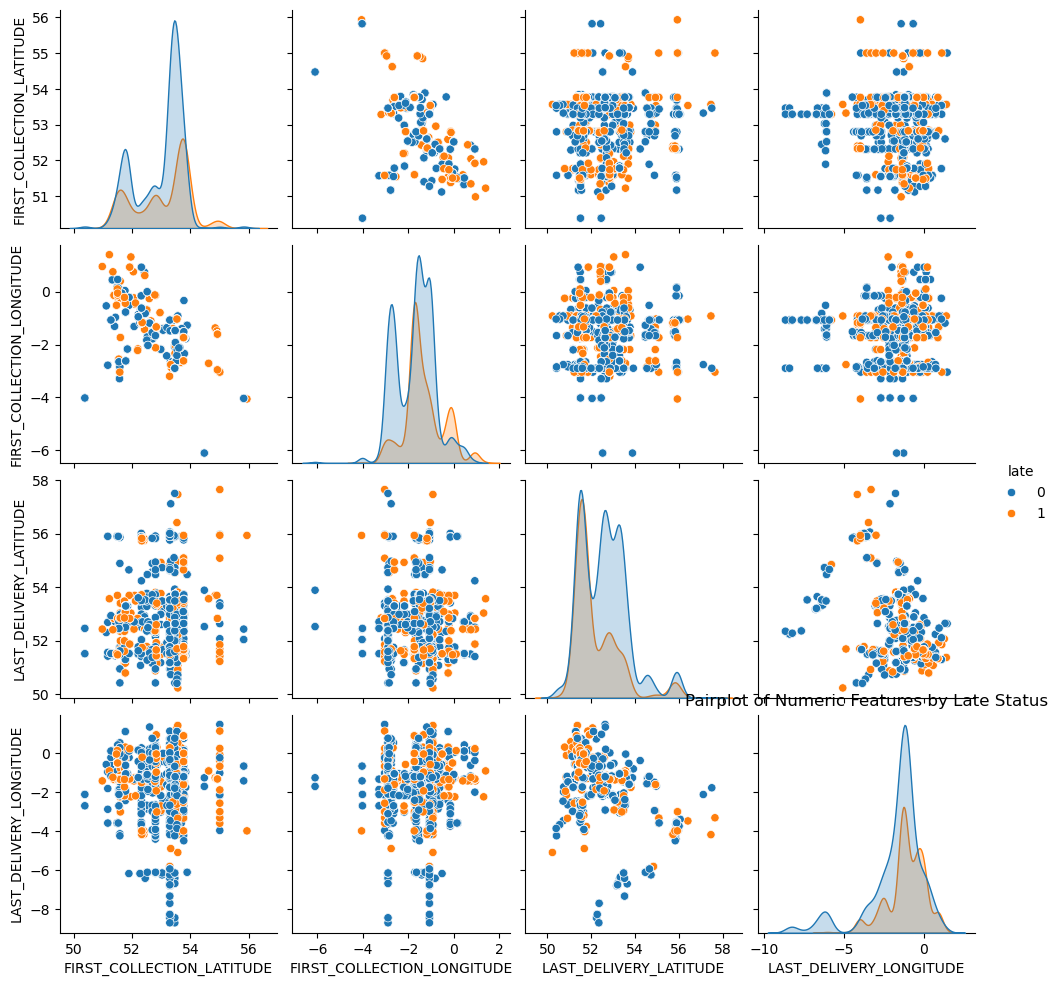

2024-05-22 13:43:47,958 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-22 13:43:47,963 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


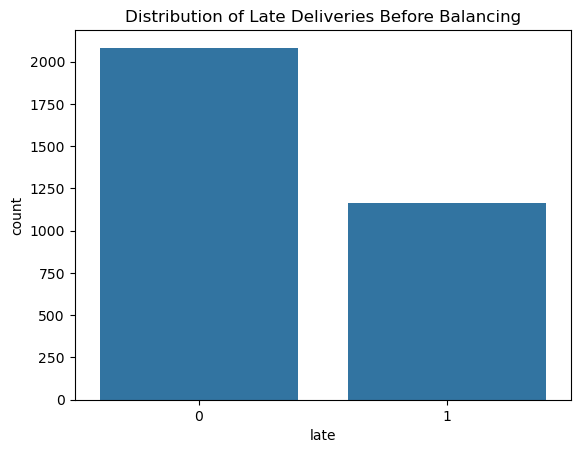

2024-05-22 13:43:48,022 - INFO - Balancing data.
2024-05-22 13:43:48,039 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-22 13:43:48,043 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


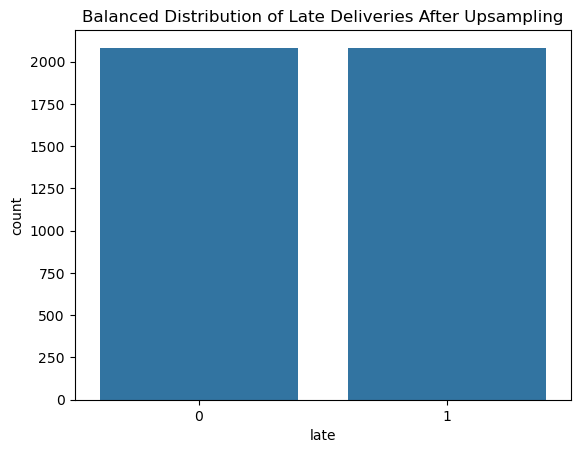

2024-05-22 13:43:48,102 - INFO - Preparing data for training.
2024-05-22 13:43:48,104 - INFO - Training set shape: (2916, 11), (2916,)
2024-05-22 13:43:48,105 - INFO - Test set shape: (1250, 11), (1250,)
2024-05-22 13:43:48,105 - INFO - Training and selecting the best model.
2024-05-22 13:43:49,353 - INFO - Random Forest cross-validation accuracy: 0.9595
2024-05-22 13:43:50,368 - INFO - Gradient Boosting cross-validation accuracy: 0.9424
2024-05-22 13:43:50,820 - INFO - AdaBoost cross-validation accuracy: 0.9396
2024-05-22 13:43:50,917 - INFO - Logistic Regression cross-validation accuracy: 0.9472
2024-05-22 13:43:50,918 - INFO - Best classifier: Random Forest with cross-validation accuracy: 0.9595
2024-05-22 13:43:51,258 - INFO - Evaluating model.


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       644
           1       0.95      0.96      0.96       606

    accuracy                           0.96      1250
   macro avg       0.96      0.96      0.96      1250
weighted avg       0.96      0.96      0.96      1250



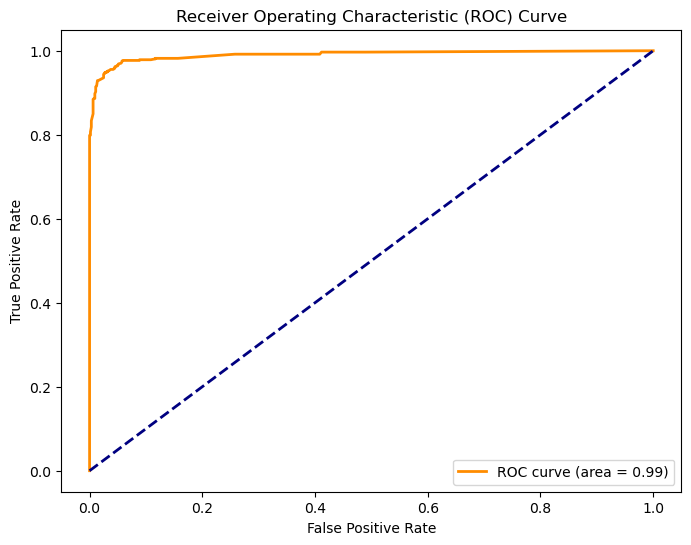

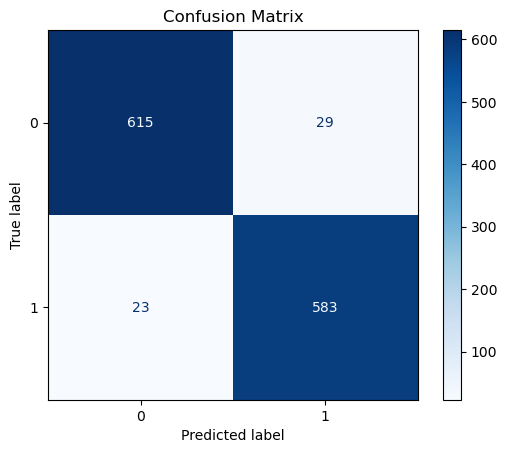

2024-05-22 13:43:51,451 - INFO - Predicting new bookings.
2024-05-22 13:43:51,476 - INFO - Visualizing predictions.


          SHIPMENT_NUMBER  Probability of Delay  Predicted Late  Actual Late
0    SEZHUK-240118-283413              0.350547               0            1
1    SEZHUK-240111-281159              0.000000               0            0
2    SEZHUK-240110-280958              0.233995               0            0
3    SEZHUK-240115-282151              0.011818               0            0
4    SEZHUK-240110-280768              0.000000               0            0
..                    ...                   ...             ...          ...
995  SEZHUK-240111-281068              0.100000               0            0
996  SEZHUK-240111-281152              0.459242               0            0
997  SEZHUK-240116-282583              0.094827               0            0
998  SEZHUK-240102-278172              0.274463               0            0
999  SEZHUK-240109-280509              0.094827               0            0

[1000 rows x 4 columns]


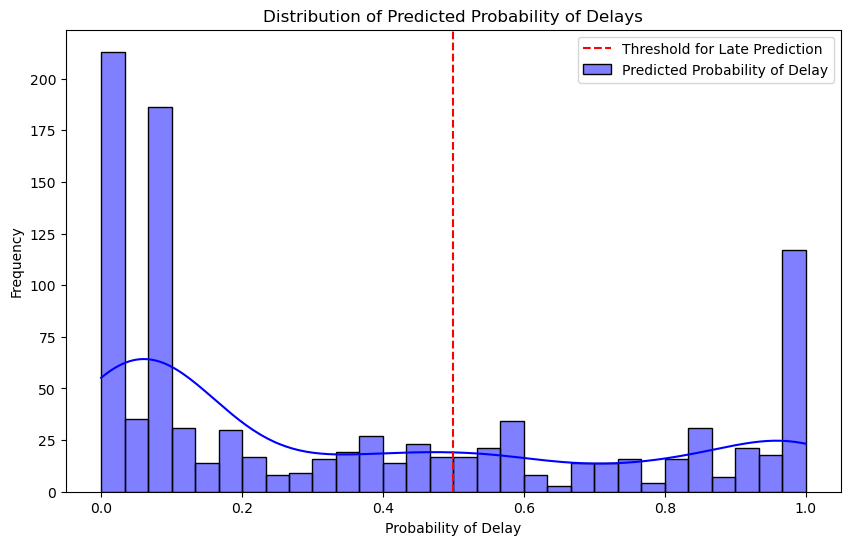

2024-05-22 13:43:51,623 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-05-22 13:43:51,628 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


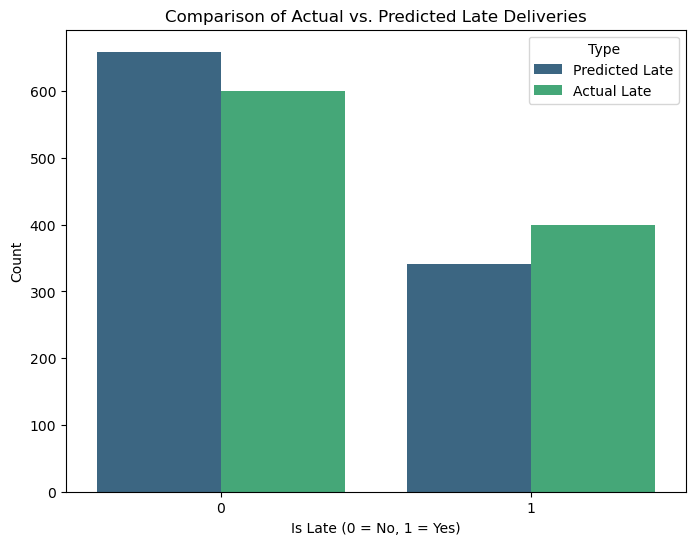

2024-05-22 13:43:51,700 - INFO - Plotting threshold comparison.


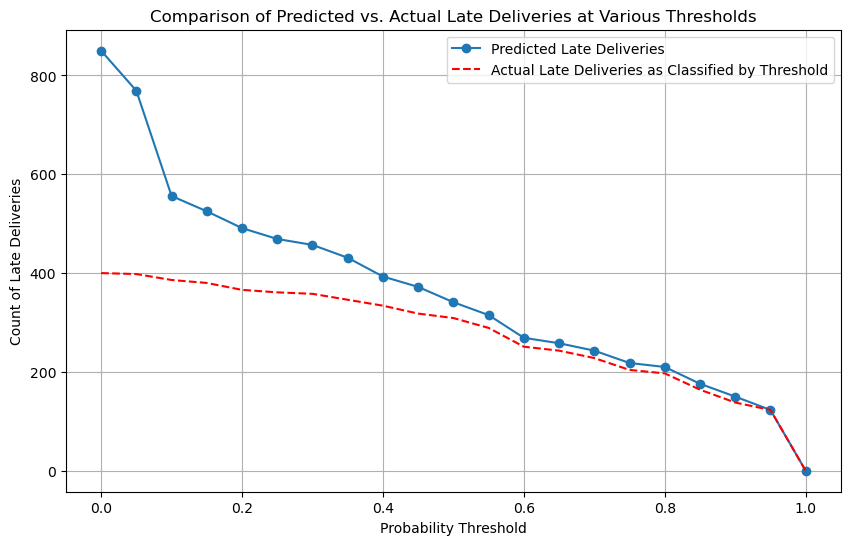

 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5001 is in use by another program. Either identify and stop that program, or start the server with a different port.


AssertionError: 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import logging
import warnings
import joblib
from flask import Flask, request, jsonify
import requests

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

warnings.filterwarnings("ignore", category=FutureWarning)

def load_and_preprocess_data(filepath):
    """
    Load and preprocess shipment data.
    Converts date columns to datetime, handles null values, and creates the target column.
    
    Parameters:
    - filepath (str): Path to the CSV file containing shipment bookings data.
    
    Returns:
    - pd.DataFrame: Preprocessed DataFrame.
    """
    try:
        logging.info("Loading and preprocessing data.")
        shipments = pd.read_csv(filepath)
        
        date_columns = ['FIRST_COLLECTION_SCHEDULE_EARLIEST', 'FIRST_COLLECTION_SCHEDULE_LATEST', 
                        'LAST_DELIVERY_SCHEDULE_EARLIEST', 'LAST_DELIVERY_SCHEDULE_LATEST']
        for col in date_columns:
            shipments[col] = pd.to_datetime(shipments[col], errors='coerce')
        
        shipments.fillna(method='ffill', inplace=True)
        shipments['late'] = ((shipments['LAST_DELIVERY_SCHEDULE_LATEST'] - shipments['LAST_DELIVERY_SCHEDULE_EARLIEST']) > pd.Timedelta(minutes=30)).astype(int)
        
        return shipments
    except Exception as e:
        logging.error(f"Error in loading and preprocessing data: {e}")
        raise

def visualize_data(shipments):
    """
    Visualize the dataset with pairplots and distribution of the target variable.
    
    Parameters:
    - shipments (pd.DataFrame): DataFrame to visualize.
    """
    try:
        logging.info("Visualizing data.")
        sns.pairplot(shipments.select_dtypes(include=['float64', 'int']), hue='late')
        plt.title('Pairplot of Numeric Features by Late Status')
        plt.show()
        
        sns.countplot(x='late', data=shipments)
        plt.title('Distribution of Late Deliveries Before Balancing')
        plt.show()
    except Exception as e:
        logging.error(f"Error in visualizing data: {e}")
        raise

def balance_data(shipments):
    """
    Balance the dataset using simple random oversampling.
    
    Parameters:
    - shipments (pd.DataFrame): DataFrame to balance.
    
    Returns:
    - pd.DataFrame: Balanced DataFrame.
    """
    try:
        logging.info("Balancing data.")
        majority_class = shipments[shipments['late'] == 0]
        minority_class = shipments[shipments['late'] == 1]
        
        minority_class_upsampled = minority_class.sample(n=len(majority_class), replace=True, random_state=42)
        shipments_balanced = pd.concat([majority_class, minority_class_upsampled])
        
        sns.countplot(x='late', data=shipments_balanced)
        plt.title('Balanced Distribution of Late Deliveries After Upsampling')
        plt.show()
        
        return shipments_balanced
    except Exception as e:
        logging.error(f"Error in balancing data: {e}")
        raise

def prepare_data_for_training(shipments_balanced):
    """
    Prepare the data for training by splitting into features and target, and applying preprocessing.
    
    Parameters:
    - shipments_balanced (pd.DataFrame): Balanced DataFrame.
    
    Returns:
    - tuple: Split and preprocessed training and testing sets, and the preprocessor.
    """
    try:
        logging.info("Preparing data for training.")
        categorical_cols = ['VEHICLE_SIZE', 'VEHICLE_BUILD_UP', 'FIRST_COLLECTION_POST_CODE', 'LAST_DELIVERY_POST_CODE']
        numeric_cols = ['FIRST_COLLECTION_LATITUDE', 'FIRST_COLLECTION_LONGITUDE', 
                        'LAST_DELIVERY_LATITUDE', 'LAST_DELIVERY_LONGITUDE']
        
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_cols),
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
            ])
        
        date_columns = ['FIRST_COLLECTION_SCHEDULE_EARLIEST', 'FIRST_COLLECTION_SCHEDULE_LATEST', 
                        'LAST_DELIVERY_SCHEDULE_EARLIEST', 'LAST_DELIVERY_SCHEDULE_LATEST']
        X_balanced = shipments_balanced.drop(['late'] + date_columns, axis=1)
        y_balanced = shipments_balanced['late']
        
        X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
        
        logging.info(f"Training set shape: {X_train.shape}, {y_train.shape}")
        logging.info(f"Test set shape: {X_test.shape}, {y_test.shape}")
        
        return X_train, X_test, y_train, y_test, preprocessor
    except Exception as e:
        logging.error(f"Error in preparing data for training: {e}")
        raise

def train_and_select_best_model(X_train, y_train, preprocessor):
    """
    Train multiple classifiers and select the best one based on cross-validation accuracy.
    
    Parameters:
    - X_train (pd.DataFrame): Training feature set.
    - y_train (pd.Series): Training target set.
    - preprocessor (ColumnTransformer): Preprocessing transformer.
    
    Returns:
    - Pipeline: Trained model pipeline.
    """
    try:
        logging.info("Training and selecting the best model.")
        classifiers = {
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingClassifier(random_state=42),
            'AdaBoost': AdaBoostClassifier(random_state=42),
            'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
        }
        
        best_classifier = None
        best_score = 0
        best_pipeline = None
        
        for name, classifier in classifiers.items():
            pipeline = Pipeline([
                ('preprocessor', preprocessor),
                ('classifier', classifier)
            ])
            
            scores = cross_val_score(pipeline, X_train, y_train, cv=5)
            score = np.mean(scores)
            logging.info(f"{name} cross-validation accuracy: {score:.4f}")
            
            if score > best_score:
                best_score = score
                best_classifier = name
                best_pipeline = pipeline
        
        logging.info(f"Best classifier: {best_classifier} with cross-validation accuracy: {best_score:.4f}")
        
        best_pipeline.fit(X_train, y_train)
        return best_pipeline
    except Exception as e:
        logging.error(f"Error in training and selecting the best model: {e}")
        raise

def evaluate_model(pipeline, X_test, y_test):
    """
    Evaluate the trained model using the test data and print evaluation metrics.
    
    Parameters:
    - pipeline (Pipeline): Trained model pipeline.
    - X_test (pd.DataFrame): Test feature set.
    - y_test (pd.Series): Test target set.
    """
    try:
        logging.info("Evaluating model.")
        y_pred = pipeline.predict(X_test)
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()
        
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.show()
    except Exception as e:
        logging.error(f"Error in evaluating model: {e}")
        raise

def predict_new_bookings(pipeline, new_bookings_path, X_train_columns):
    """
    Predict late deliveries on new bookings data using the trained model pipeline.
    
    Parameters:
    - pipeline (Pipeline): Trained model pipeline.
    - new_bookings_path (str): Path to the CSV file containing new bookings data.
    - X_train_columns (Index): Columns from the training feature set for alignment.
    
    Returns:
    - pd.DataFrame: DataFrame with prediction results.
    """
    try:
        logging.info("Predicting new bookings.")
        new_data = pd.read_csv(new_bookings_path)
        
        new_data['LAST_DELIVERY_SCHEDULE_LATEST'] = pd.to_datetime(new_data['LAST_DELIVERY_SCHEDULE_LATEST'])
        new_data['LAST_DELIVERY_SCHEDULE_EARLIEST'] = pd.to_datetime(new_data['LAST_DELIVERY_SCHEDULE_EARLIEST'])
        new_data['Actual Late'] = ((new_data['LAST_DELIVERY_SCHEDULE_LATEST'] - new_data['LAST_DELIVERY_SCHEDULE_EARLIEST']) > pd.Timedelta(minutes=30)).astype(int)
        
        for col in X_train_columns:
            if col not in new_data.columns:
                new_data[col] = 0
        
        new_data_for_prediction = new_data[X_train_columns]
        
        new_data['Probability of Delay'] = pipeline.predict_proba(new_data_for_prediction)[:, 1]
        new_data['Predicted Late'] = (new_data['Probability of Delay'] > 0.5).astype(int)
        
        result_columns = ['SHIPMENT_NUMBER', 'Probability of Delay', 'Predicted Late', 'Actual Late']
        print(new_data[result_columns])
        
        return new_data
    except Exception as e:
        logging.error(f"Error in predicting new bookings: {e}")
        raise

def visualize_predictions(new_data):
    """
    Visualize the predicted probabilities and comparison of actual vs. predicted late deliveries.
    
    Parameters:
    - new_data (pd.DataFrame): DataFrame containing prediction results.
    """
    try:
        logging.info("Visualizing predictions.")
        plt.figure(figsize=(10, 6))
        sns.histplot(new_data['Probability of Delay'], bins=30, kde=True, color='blue', label='Predicted Probability of Delay')
        plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold for Late Prediction')
        plt.title('Distribution of Predicted Probability of Delays')
        plt.xlabel('Probability of Delay')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

        comparison_df = new_data[['Predicted Late', 'Actual Late']].melt(var_name='Status', value_name='Late')
        plt.figure(figsize=(8, 6))
        sns.countplot(x='Late', hue='Status', data=comparison_df, palette='viridis')
        plt.title('Comparison of Actual vs. Predicted Late Deliveries')
        plt.xlabel('Is Late (0 = No, 1 = Yes)')
        plt.ylabel('Count')
        plt.legend(title='Type', labels=['Predicted Late', 'Actual Late'])
        plt.show()
    except Exception as e:
        logging.error(f"Error in visualizing predictions: {e}")
        raise

def plot_threshold_comparison(new_data):
    """
    Plot the comparison of predicted vs. actual late deliveries at various probability thresholds.
    
    Parameters:
    - new_data (pd.DataFrame): DataFrame containing prediction results.
    """
    try:
        logging.info("Plotting threshold comparison.")
        thresholds = np.arange(0.0, 1.05, 0.05)

        predicted_late_counts = [np.sum(new_data['Probability of Delay'] > t) for t in thresholds]
        actual_late_counts = [np.sum((new_data['Actual Late'] == 1) & (new_data['Probability of Delay'] > t)) for t in thresholds]

        plt.figure(figsize=(10, 6))
        plt.plot(thresholds, predicted_late_counts, marker='o', label='Predicted Late Deliveries')
        plt.plot(thresholds, actual_late_counts, 'r--', label='Actual Late Deliveries as Classified by Threshold')

        plt.title('Comparison of Predicted vs. Actual Late Deliveries at Various Thresholds')
        plt.xlabel('Probability Threshold')
        plt.ylabel('Count of Late Deliveries')
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        logging.error(f"Error in plotting threshold comparison: {e}")
        raise

def get_weather_data(lat, lon, date_time):
    """
    Fetch weather data for a specific location and time.
    
    Parameters:
    - lat (float): Latitude of the location.
    - lon (float): Longitude of the location.
    - date_time (str): Date and time in ISO format.
    
    Returns:
    - dict: Weather data.
    """
    try:
        api_key = 'your_api_key'  # Replace with your actual API key
        url = f'https://api.weatherapi.com/v1/history.json?key={api_key}&q={lat},{lon}&dt={date_time}'
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        return response.json()
    except Exception as e:
        logging.error(f"Error fetching weather data: {e}")
        raise

def enhance_data_with_weather(shipments):
    """
    Enhance shipment data with weather information.
    
    Parameters:
    - shipments (pd.DataFrame): DataFrame containing shipment data.
    
    Returns:
    - pd.DataFrame: DataFrame with additional weather features.
    """
    try:
        logging.info("Enhancing data with weather information.")
        weather_data = []
        for index, row in shipments.iterrows():
            weather = get_weather_data(row['LAST_DELIVERY_LATITUDE'], row['LAST_DELIVERY_LONGITUDE'], row['LAST_DELIVERY_SCHEDULE_EARLIEST'].isoformat())
            weather_data.append(weather)
        
        # Extract relevant weather features (e.g., temperature, precipitation)
        shipments['temperature'] = [data['current']['temp_c'] for data in weather_data]
        shipments['precipitation'] = [data['current']['precip_mm'] for data in weather_data]
        
        return shipments
    except Exception as e:
        logging.error(f"Error enhancing data with weather information: {e}")
        raise

# Flask app for serving the model
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.json  # Get JSON data from the request
        df = pd.DataFrame(data)
        model = joblib.load('best_model.pkl')
        predictions = model.predict_proba(df)[:, 1]  # Get prediction probabilities
        return jsonify(predictions.tolist())
    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == '__main__':
    try:
        # File paths
        shipments_path = 'Shipment_bookings.csv'
        new_bookings_path = 'New_bookings.csv'
        
        # Load and preprocess data
        shipments = load_and_preprocess_data(shipments_path)
        
        # Visualize the data
        visualize_data(shipments)
        
        # Balance the data
        shipments_balanced = balance_data(shipments)
        
        # Prepare data for training
        X_train, X_test, y_train, y_test, preprocessor = prepare_data_for_training(shipments_balanced)
        
        # Train and select the best model
        best_pipeline = train_and_select_best_model(X_train, y_train, preprocessor)
        
        # Save the model
        joblib.dump(best_pipeline, 'best_model.pkl')
        
        # Evaluate the model
        evaluate_model(best_pipeline, X_test, y_test)
        
        # Predict new bookings
        new_data = predict_new_bookings(best_pipeline, new_bookings_path, X_train.columns)
        
        # Visualize predictions
        visualize_predictions(new_data)
        
        # Plot threshold comparison
        plot_threshold_comparison(new_data)
        
        # Run the Flask app on a different port to avoid conflicts
        app.run(host='0.0.0.0', port=5001)
    except Exception as e:
        logging.error(f"An error occurred in the main execution: {e}")
